## $$\text{2D & 3D Integration using scipy.integration method}$$

In [1]:
import scipy.integrate as si
import numpy as np

Q1. Find the total charge on an elliptical surface defined by $\displaystyle{\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1}$. Where the charge density is $\displaystyle{ρ(x, y) = exp −(x^2 + y^2)}$

Charge Density: $\rho=\frac{q}{A}$ where, q is the charge and A is the area of the surface. 
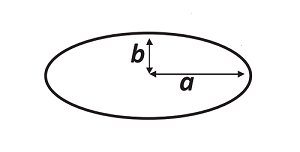


Calculating the area in the first quadrant using double integral and multiply by 4 $,i.e., \displaystyle\large{A= \int_{-a}^{a} \int_{-b \sqrt{1-\frac{x^2}{a^2}}}^{b \sqrt{1-\frac{x^2}{a^2}}} \text{ d}y \text{ d}x}$

In [2]:
a,b = 1,2         # input initial value
f1  = lambda y, x: np.exp(-(x**2+y**2))*((x**2)/(a**2))+((y**2)/(b**2)) # f = charge density * area
Q1  = (si.dblquad(f1,-a, a, lambda x:-(b/a)*(((a**2)-(x**2))**0.5), lambda x:(b/a)*(((a**2)-(x**2))**0.5))[0]) # charge
print('q =',Q1,'C')   

q = 2.156579168296644 C


Q2. Electric field at some region is given as $\displaystyle{\vec{E}= 3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}}$. 
Find the total charge within a sphere of radius 2.
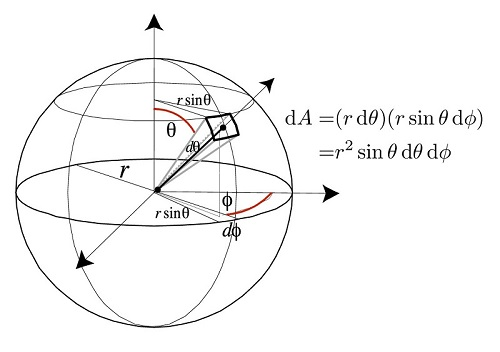

$ \displaystyle \newcommand{\ud}{\,\mathrm{d}} {\\  
 \oint\vec{E}\cdot\ud\vec{s}=\frac{Q}{\epsilon_0} => Q= \oint\epsilon_0\vec{E}\cdot\ud\vec{s}} $

$ \displaystyle{\text{permittivity of free space : }\epsilon_0 = 8.85 * 10^{-12} C^2/Nm^2 
\text{ and for sphere : } \ud \vec{s}=r^2\sin\theta \ud \theta \ud \phi \ud r \hat{r} }$

$ \displaystyle{ \vec{E} \cdot \ud \vec{s} = (3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}) \cdot (r^2\sin\theta \ud \theta \ud \phi \hat{r})= (3 (r^2 \cos^2 θ − 1) )\times(r^2\sin\theta \ud \theta \ud \phi )}$

$ \displaystyle{ \text{as } \hat{r}\cdot\hat{r}=1,\hat{\theta}\cdot\hat{\theta}=1,\hat{\phi}\cdot\hat{\phi}=1,\hat{r}\cdot\hat{\theta}=0,\hat{r}\cdot\hat{\phi}=0,\hat{\theta}\cdot\hat{\phi}=0}$

$ \displaystyle{Q = \iint \epsilon_0 \vec{E} \cdot \ud \vec{s} = \iint 3 \epsilon_0 (r^2 \cos^2 θ − 1) \times r^2\sin\theta \ud \theta \ud\phi }$

In [3]:
r  = 2                          # given radius
E0 = 8.85 * 10**(-12)           # permittivity of free space
f2 = lambda phi, th : np.dot(E0*(3*((r**2*np.cos(th)**2)-1)), np.sin(th)*r**2)  # 𝜖0E⋅ ds
Q2 = si.dblquad(f2, 0, np.pi, lambda phi: 0, lambda phi: 2*np.pi)   # total charge
print('q =',Q2[0],'C')

q = 4.4484951974831474e-10 C


Q3. Hydrogen atom wave function in $2p_{0}$ state is given by $\displaystyle{ψ_{2p_0} = \frac{1}{4 \sqrt{2\pi}} \sqrt{\frac{1}{a_0^3}} \frac{r}{a_0} \exp(− \frac{r}{2a_0})}$. 

Find the values of the uncertainties in $x$ and $z$ direction.
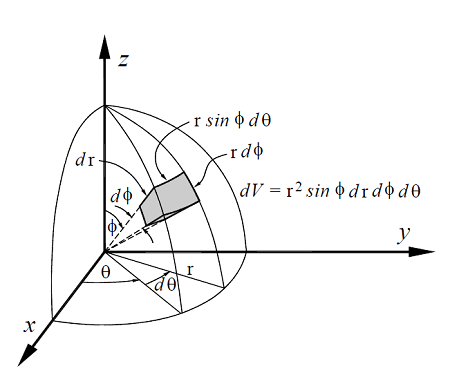

uncertainty of position : $ \displaystyle {\Delta{x} = \sqrt{<\hat{x}^2> - <\hat{x}>^2}}$

$\displaystyle { x=r\sin\phi\cos\theta \text{ and } z=r\cos\phi }$

$\displaystyle {\hat{x}^2> = \iiint (\psi_{2p_0})^2 r^2 \sin^2\phi \cos^2 \theta r^2 \sin \phi \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{x}>  = \iiint (\psi_{2p_0})^2 r \sin\phi \cos\theta r^2 \sin \phi \text{ d}\theta \text{ d}\phi \text{ d}r}$

$\displaystyle {<\hat{z}^2> = \iiint (\psi_{2p_0})^2 r^2 \cos^2\phi r^2 \sin \phi \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{z}>  = \iiint (\psi_{2p_0})^2 r \cos\phi r^2 \sin \phi \text{ d}\theta \text{ d}\phi \text{ d}r}$

In [4]:
a0  = 1
fx2 = lambda t,f,r:(1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0))*r*np.sin(f)*np.cos(t))**2*r**2*np.sin(f)
x2  = si.tplquad(fx2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑥̂²>
fx1 = lambda t,f,r:(1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0)))**2*r*np.sin(f)*np.cos(t)*r**2*np.sin(f)
x1  = si.tplquad(fx1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑥̂ >
dx  = (x2-(x1**2))**0.5     # Δ𝑥
print('<𝑥̂>:',x1,'\t<𝑥̂\u00b2>:',x2,'\tdx:\u221A{<𝑥̂\u00b2>-<𝑥̂>\u00b2} =',dx)

fz2 = lambda t,f,r: (1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0))*r*np.cos(f))**2*r**2*np.sin(f)
z2  = si.tplquad(fz2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,t:0,lambda r,t:np.pi*2)[0]   # <𝑧̂²>
fz1 = lambda t,f,r: (1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0)))**2*r*np.cos(f)*r**2*np.sin(f)
z1  = si.tplquad(fz1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑧̂ >
dz  = (z2-(z1**2))**0.5     #  Δz
print('<𝑧̂>:',z1,'\t<𝑧̂\u00b2>:',z2,u'\tdz:\u221A{<𝑧̂\u00b2>-<𝑧̂>\u00b2} =',dz)

<𝑥̂>: 4.549610406684606e-16 	<𝑥̂²>: 30.0 	dx:√{<𝑥̂²>-<𝑥̂>²} = 5.477225575051661
<𝑧̂>: 7.468401574530467e-16 	<𝑧̂²>: 30.0 	dz:√{<𝑧̂²>-<𝑧̂>²} = 5.477225575051661
